In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv')
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [4]:
#Data Analysis, Summary Statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

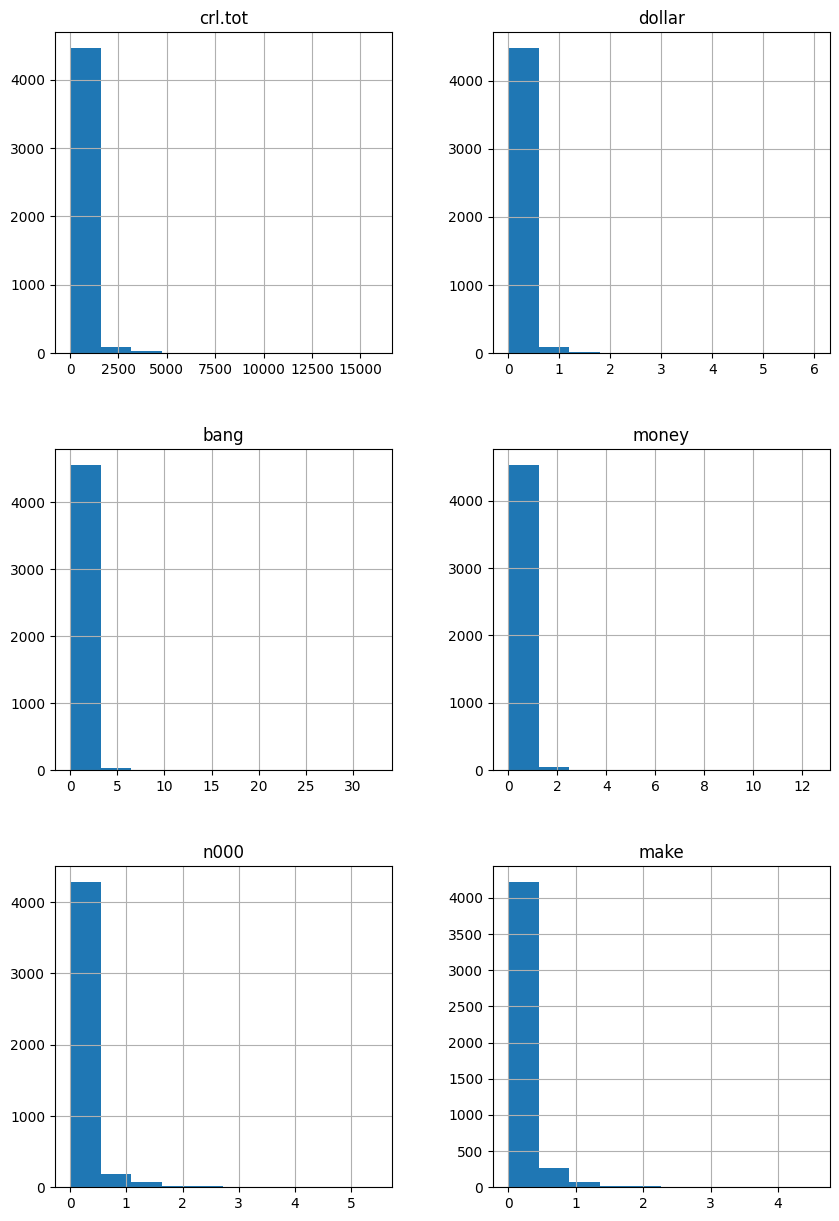

In [5]:
#histograms
df.hist(figsize = (10,15))

In [6]:
#Removing Outliers
df = df[df["crl.tot"] < 1500]
df = df[df["bang"] < 5]
df = df[df["money"] < 6]
print(len(df))

4432


In [7]:
#Dummy Datas
df['yesno'] = np.where(df["yesno"] == "y", 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


<Axes: >

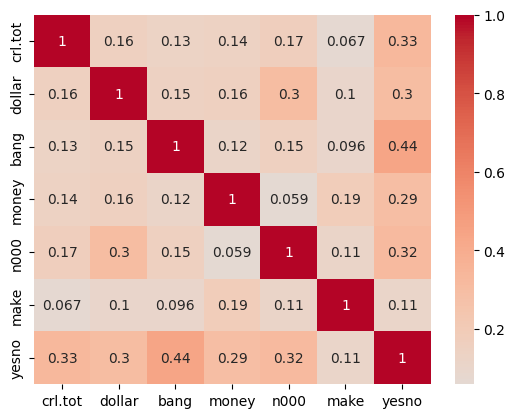

In [8]:
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm')

In [9]:
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.00,0.000,0.00,0.00,0.31,0
4597,14,0.00,0.353,0.00,0.00,0.00,0
4598,118,0.00,0.000,0.00,0.00,0.30,0
4599,78,0.00,0.000,0.00,0.00,0.96,0


In [10]:
#Logistic Regression preperation
y = df.yesno
X = df.drop(columns = ['yesno'])
X = sm.add_constant(X)
X.head()

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21
3,1.0,191,0.00,0.137,0.00,0.00,0.00
4,1.0,191,0.00,0.135,0.00,0.00,0.00
5,1.0,54,0.00,0.000,0.00,0.00,0.00


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state=1502)

In [13]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.4210
Time:                        16:36:26   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [14]:
#Create the function
def logistic_reader(coefficient):
    probability = round((np.exp(coefficient) - 1) * 100, 2)
    if probability > 0:
        print("The likelihood increases by", probability, "%")
    elif probability == 0:
        print("No Impact")
    else:
        print("The likelihood decreases by", probability, "%")

In [15]:
logistic_reader(-0.5)

The likelihood decreases by -39.35 %


In [16]:
prediction = model.predict(X_test)
prediction = np.where(prediction > 0.5, 1, 0)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_test.mean()

0.35400225479143177

In [19]:
confusion_matrix(y_test, prediction)

array([[524,  49],
       [102, 212]], dtype=int64)

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

In [21]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(accuracy)

0.8297632468996617


In [22]:
#f1 Score
f1 = 2*tp / (2* tp + fn + fp)
print(f1)

0.7373913043478261


In [23]:
#specificity
specific = tn / (tn + fp)
print(specific)

0.9144851657940664


In [24]:
sensitivity = tp / (tp +fn)
print(sensitivity)

0.6751592356687898


In [25]:
#classification_report

from sklearn.metrics import classification_report
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887



In [26]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.4210
Time:                        16:36:28   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.000      8.985      0.000       0.001       0.002
dollar         6.5798      0.682      9.652      0.0